# Zurich neighbourhoods and apartment renting prices

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!pip install geopy

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

from arcgis.gis import GIS
from arcgis.geocoding import geocode, reverse_geocode
from arcgis.geometry import Point

gis = GIS()

print('Libraries imported.')

Libraries imported.


## 1. Importing district and neighbourhood data and find GPS coordinate

#### Districts and neighboorhoods are imported from a csv file, that was manually created from Wikipedia data

In [3]:
df=pd.read_csv('Quartieri_Zurigo.csv')
df.head()

,District Number,District Name,Neighborhood
0,1,Altstadt,Rathaus
1,1,Altstadt,Hochschulen
2,1,Altstadt,Lindenhof
3,1,Altstadt,City
4,2,NaN,Wollishofen


#### Geocode is used for finding the neighborhood GPS coordinates based on neighborhood names

In [4]:
lat=[]
long=[]
for i in df['Neighborhood']:
    label = '{}, Zurich, Switzerland'.format(i)
    geocode_result = geocode(address= label)
    d=geocode_result[0]['location']
    print(d)
    lat.append(d['y'])
    long.append(d['x'])
print(lat)
print(long)


{'x': 8.542859992209788, 'y': 47.37153997446484}
{'x': 8.550599936667268, 'y': 47.37204005107048}
{'x': 8.810920000000067, 'y': 47.624870000000044}
{'x': 8.536300003895212, 'y': 47.37491998167821}
{'x': 8.530010000000061, 'y': 47.33941000000004}
{'x': 8.513160000000028, 'y': 47.33137000000005}
{'x': 8.531760000000077, 'y': 47.36024000000003}
{'x': 8.507700000000057, 'y': 47.35928000000007}
{'x': 8.506227109445389, 'y': 47.363269720513436}
{'x': 8.511640000000057, 'y': 47.37382000000008}
{'x': 8.702235943088823, 'y': 47.59697101045778}
{'x': 8.529996617841922, 'y': 47.38279022081556}
{'x': 8.620130000000074, 'y': 47.43583000000007}
{'x': 8.795477885398647, 'y': 47.32496083768355}
{'x': 8.522448597013945, 'y': 47.39072461352836}
{'x': 8.540160000000071, 'y': 47.39763000000005}
{'x': 8.54857000000004, 'y': 47.38426000000004}
{'x': 8.559380000000033, 'y': 47.37905000000006}
{'x': 8.583930000000066, 'y': 47.376540000000034}
{'x': 8.57519000000002, 'y': 47.363710000000026}
{'x': 8.5966200000

In [5]:
df['latitude']=lat
df['longitude']=long
df.head()

,District Number,District Name,Neighborhood,latitude,longitude
0,1,Altstadt,Rathaus,47.37154,8.54286
1,1,Altstadt,Hochschulen,47.37204,8.55060
2,1,Altstadt,Lindenhof,47.62487,8.81092
3,1,Altstadt,City,47.37492,8.53630
4,2,NaN,Wollishofen,47.33941,8.53001


#### A dictionary of neighbourhoods and relative disctricts is created for later use

In [500]:
district={}
N=df['Neighborhood']
for i in range (len(N)):
    if N[i] in district:
        i=i+1
    else:
      ind=df[N==N[i]].index.item()  
      district[N[i]]=df['District Number'][ind]                             


In [502]:
# Find Zurich coordinates for the map
address = 'Zurich, Switzerland'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Zurich are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Zurich are 47.3723941, 8.5423328.


#### Create map of Zurich with indications of its neighbourhoods 

In [536]:
# create map of Zurich using latitude and longitude values
map_Zurich = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['latitude'], df['longitude'], df['District Number'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Zurich

#### From analysis of the map above we see that the location of some neighbourhoods is not the correct one. Thus a list of the wrongly located neighbourhoods is created first. Then a list of the corresponding correct coordinates, manualy searched in Google Map, is created.

In [9]:
list=['Lindenhof', 'Werd', 'Gewerbeschule', 'Seefeld', 'Mühlebach', 'Affoltern', 'Alt-Wiedikon', 'Albisrieden', 'Altstetten', 'Hard', 'Gewerbeschule', 'Langstrasse', 'Escher Wyss', 'Höngg']

lind=[]
for i in list:
    ind=np.where(df['Neighborhood']==i)
    lind.append(ind[0][0].tolist())
lind

[2, 10, 13, 21, 22, 28, 7, 24, 25, 12, 13, 11, 14, 26]

In [10]:
coo_rev=[(47.372887,8.540017), (47.371876,8.518611), (47.384126,8.512254), (47.360624,8.550236), (47.3570689,8.5560539), (47.4204379,8.5039176), (47.363867,8.517598), (47.372169,8.486336), (47.391190,8.488226), (47.382241,8.514117), (47.384203,8.531153), (47.377041,8.527305), (47.390153,8.514517), (47.401250,8.497992)]


#### New dataframe with corrected GPS coordinates

In [11]:
for i,k in zip(lind,coo_rev):
    df.loc[[i],'latitude':'longitude'] = k
df    

,District Number,District Name,Neighborhood,latitude,longitude
0,1,Altstadt,Rathaus,47.371540,8.542860
1,1,Altstadt,Hochschulen,47.372040,8.550600
2,1,Altstadt,Lindenhof,47.372887,8.540017
3,1,Altstadt,City,47.374920,8.536300
4,2,NaN,Wollishofen,47.339410,8.530010
5,2,NaN,Leimbach,47.331370,8.513160
6,2,NaN,Enge,47.360240,8.531760
7,3,Wiedikon,Alt-Wiedikon,47.363867,8.517598
8,3,Wiedikon,Friesenberg,47.363270,8.506227
9,3,Wiedikon,Sihlfeld,47.373820,8.511640


#### Revised map

In [12]:
# create map of Zurich using latitude and longitude values
map_Toronto_rev = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['latitude'], df['longitude'], df['District Number'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto_rev)  
    
map_Toronto_rev

# 2. Find venues based on neighbourhoods from Foursquare API

In [13]:
CLIENT_ID = '1X3QR100SLNE1BXGRTXKGSLEVEHZ5TAXC5OLFIBSFN3LF13Y' # your Foursquare ID
CLIENT_SECRET = 'NUBDXLM523VW51IEAZCLLBKHXRZRXC3Z1XXYICY0H2T3QSZX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1X3QR100SLNE1BXGRTXKGSLEVEHZ5TAXC5OLFIBSFN3LF13Y
CLIENT_SECRET:NUBDXLM523VW51IEAZCLLBKHXRZRXC3Z1XXYICY0H2T3QSZX


In [14]:
#latitude=neighborhood_latitude
#longitude=neighborhood_longitude
radius=500
LIMIT=1000


def getNearbyVenues(district, names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for dist, name, lat, lng in zip(district, names, latitudes, longitudes):
#        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            dist,
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District','Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [15]:
Zuri_venues = getNearbyVenues(district=df['District Number'], names=df['Neighborhood'],                                   
                                   latitudes=df['latitude'],
                                   longitudes=df['longitude']
                                  )

In [37]:
print(Zuri_venues.shape)
Zuri_venues

(1060, 8)


,District,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,1,Rathaus,47.371540,8.542860,Old Crow,47.372092,8.541024,Cocktail Bar
1,1,Rathaus,47.371540,8.542860,Fitnesspark Münstergasse,47.370888,8.544999,Gym / Fitness Center
2,1,Rathaus,47.371540,8.542860,Schwarzenbach Kolonialwaren,47.371444,8.544091,Gourmet Shop
3,1,Rathaus,47.371540,8.542860,Lindenhof,47.373005,8.540883,Pedestrian Plaza
4,1,Rathaus,47.371540,8.542860,Café Schober,47.371400,8.544149,Café
5,1,Rathaus,47.371540,8.542860,Äss-Bar,47.372561,8.543693,Bakery
6,1,Rathaus,47.371540,8.542860,Widder Bar,47.372415,8.539863,Hotel Bar
7,1,Rathaus,47.371540,8.542860,Café Henrici,47.372516,8.543686,Café
8,1,Rathaus,47.371540,8.542860,Changemaker,47.371868,8.543672,Arts & Crafts Store
9,1,Rathaus,47.371540,8.542860,Münsterhof,47.370051,8.540886,Plaza


In [366]:
#remove unnecessary columns from Zuri_venues and create a dataframe containing a column for each venue category
df2 = pd.get_dummies(Zuri_venues, columns=['Venue Category'],prefix="", prefix_sep="")
df2.drop(df2.columns[[2,3,4,5,6]], axis=1, inplace=True)
df2.head()

,District,Neighborhood,Accessories Store,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Bathing Area,Beach,Beer Bar,Beer Garden,Bistro,Board Shop,Bookstore,Botanical Garden,Boutique,Breakfast Spot,Burger Joint,Burrito Place,Bus Station,Business Service,Cable Car,Cafeteria,Café,Cambodian Restaurant,Candy Store,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Community Center,Concert Hall,Cosmetics Shop,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Diner,Discount Store,Doner Restaurant,Donut Shop,Electronics Store,Ethiopian Restaurant,Event Space,Factory,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Historic Site,History Museum,Hockey Rink,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lebanese Restaurant,Light Rail Station,Liquor Store,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Meyhane,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Moroccan Restaurant,Movie Theater,Museum,Music Store,Music Venue,Nightclub,Optical Shop,Other Great Outdoors,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Peruvian Restaurant,Pharmacy,Pier,Pizza Place,Platform,Playground,Plaza,Pool,Pool Hall,Pub,Restaurant,River,Rock Club,Roof Deck,Salad Place,Sandwich Place,Sauna / Steam Room,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Taverna,Thai Restaurant,Theater,Tibetan Restaurant,Toy / Game Store,Trade School,Trail,Train Station,Tram Station,Trattoria/Osteria,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Wine Bar,Wine Shop,Yoga Studio
0,1,Rathaus,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,Rathaus,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,Rathaus,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,Rathaus,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,Rathaus,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [367]:
df2.shape

(1060, 175)

In [368]:
df2m=df2.copy()

#### Reduce and merge venue categories to a sub list of relevant main categories by searching for key labels and group the dataframe by district

In [369]:
new_cat=['Station', 'Restaurant', 'Café', 'Bar', 'Pub', 'Shop', 'Store', 'store', 'Supermarket', 'Museum', 'Gallery', 'Market', 'Gym', 'Fitness', 'Pool']

for i in new_cat:
    a = [col for col in df2m.columns if i in col]
    df2m[i] = df2m[a].sum(axis=1)
df2m.head()

l=['District']
new_col=l+new_cat
df3=df2m.loc[:, new_col]

df3d=df3.groupby(df3['District']).sum().reset_index()
df3d


,District,Station,Restaurant,Café,Bar,Pub,Shop,Store,store,Supermarket,Museum,Gallery,Market,Gym,Fitness,Pool
0,1,2,89,23,39,2,43,33,3,4,3,0,2,6,5,1
1,2,8,12,1,4,1,2,2,0,3,2,0,0,0,0,1
2,3,2,30,7,6,0,2,0,0,4,0,0,0,1,0,1
3,4,3,78,10,28,0,4,2,0,2,0,0,0,0,0,0
4,5,4,39,10,16,1,7,3,0,2,3,1,0,3,2,0
5,6,6,10,1,0,0,1,1,0,3,0,0,0,0,0,0
6,7,7,2,0,0,0,0,3,0,2,0,0,0,1,1,0
7,8,4,32,6,6,0,5,0,0,5,4,0,0,0,0,1
8,9,6,13,1,0,0,3,4,0,8,0,0,1,3,1,0
9,10,4,4,1,0,0,1,2,0,1,0,0,0,2,0,1


#### Add a column with district average prices (taken from city statistics office) and add it to the dataframe. Group further silimilar type categories in single columns

In [133]:
# Average district apartment renting prices
p=[17.9, 15.6, 14.9, 14.7, 14.9, 15.4, 15.4, 16.1, 15.4, 15.9, 15.7, 14.9]
y = np.asarray(p)

In [303]:
df3m=df3d.copy()
df3m['Bars']=df3m['Bar']+df3m['Pub']
df3m['Stores']=df3m['Shop']+df3m['Store']+df3m['store']+df3m['Supermarket']+df3m['Market']
df3m['Museums']=df3m['Museum']+df3m['Gallery']
df3m['Sport']=df3m['Gym']+df3m['Fitness']+df3m['Pool']
df3m['Price']=pd.DataFrame(y)
new_cols=['District', 'Station', 'Restaurant','Bars', 'Café','Stores','Museums', 'Sport', 'Hotel','Price' ]
df3m=df3m.loc[:, new_cols]
df3m

,District,Station,Restaurant,Bars,Café,Stores,Museums,Sport,Hotel,Price
0,1,4,166,62,23,166,6,22,16,17.9
1,2,16,20,6,1,11,4,1,1,15.6
2,3,4,56,7,7,8,0,2,0,14.9
3,4,6,148,34,10,14,0,0,4,14.7
4,5,8,72,23,10,22,7,9,9,14.9
5,6,12,18,0,1,7,0,0,3,15.4
6,7,14,4,0,0,8,0,4,0,15.4
7,8,8,60,8,6,15,8,1,8,16.1
8,9,12,25,0,1,23,0,6,2,15.4
9,10,8,8,0,1,7,0,5,0,15.9


# 3. Attempt to find a regression to predict renting prices based on dicrict venues

In [304]:
#correlations
df3m.corr()

,District,Station,Restaurant,Bars,Café,Stores,Museums,Sport,Hotel,Price
District,1.000000,0.611626,-0.593316,-0.640033,-0.650558,-0.446847,-0.389545,-0.392403,-0.448047,-0.265648
Station,0.611626,1.000000,-0.643869,-0.579011,-0.688366,-0.366205,-0.334173,-0.435546,-0.496125,-0.280607
Restaurant,-0.593316,-0.643869,1.000000,0.944403,0.909378,0.687811,0.396744,0.559192,0.766352,0.397587
Bars,-0.640033,-0.579011,0.944403,1.000000,0.962208,0.843211,0.479678,0.752837,0.845887,0.561596
Café,-0.650558,-0.688366,0.909378,0.962208,1.000000,0.838670,0.554469,0.772929,0.868568,0.566914
Stores,-0.446847,-0.366205,0.687811,0.843211,0.838670,1.000000,0.420543,0.913721,0.820290,0.846276
Museums,-0.389545,-0.334173,0.396744,0.479678,0.554469,0.420543,1.000000,0.441973,0.760181,0.456173
Sport,-0.392403,-0.435546,0.559192,0.752837,0.772929,0.913721,0.441973,1.000000,0.778108,0.771784
Hotel,-0.448047,-0.496125,0.766352,0.845887,0.868568,0.820290,0.760181,0.778108,1.000000,0.689796
Price,-0.265648,-0.280607,0.397587,0.561596,0.566914,0.846276,0.456173,0.771784,0.689796,1.000000


#### The venues with strongest correlations are used to derive a multilinear regressions. Previous attempts were also conducted with other variable combinations, with single indipendent variable and with polynomial regressions.

In [305]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import preprocessing

X=df3m[['Stores', 'Sport', 'Café', 'Hotel']]
#X= preprocessing.StandardScaler().fit(X).transform(X)
Y=df3m[['Price']]

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (9, 4) (9, 1)
Test set: (3, 4) (3, 1)


In [306]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
print(lm.coef_)
print(lm.score(X_train, Y_train))

[[-0.00725693  0.10516853 -0.02899817  0.14428179]]
0.9281119142380988


In [307]:
y_pre=lm.predict(X_train)
print(y_pre)
print(Y_train)

[[15.55576951]
 [15.83339081]
 [15.05901797]
 [14.97912836]
 [17.86033231]
 [15.25034946]
 [15.4627722 ]
 [16.08630343]
 [15.71293594]]
    Price
9    15.9
8    15.4
2    14.9
11   14.9
0    17.9
1    15.6
5    15.4
7    16.1
10   15.7


In [308]:
lm.score(X_test, Y_test)

-15.846838376919033

#### R2 score is completely off, therefore the regression (with the selected venues) is not able to predict renting prices.

# 4. Apply K-Neighbors classifier to model prices based on district venues

#### For a classifier the prices have been transormed in 3 discrete levels based on the actual district value range. (0,1,2 in ascending order)

In [387]:
# District price levels (ascending order)
p1=[2, 1, 0, 0, 0, 1, 1, 2, 1, 2, 2, 0]
y1 = np.asarray(p1)
df4=df3m.copy()
df4['Price']=pd.DataFrame(y1)
df4

,District,Station,Restaurant,Bars,Café,Stores,Museums,Sport,Hotel,Price
0,1,4,166,62,23,166,6,22,16,2
1,2,16,20,6,1,11,4,1,1,1
2,3,4,56,7,7,8,0,2,0,0
3,4,6,148,34,10,14,0,0,4,0
4,5,8,72,23,10,22,7,9,9,0
5,6,12,18,0,1,7,0,0,3,1
6,7,14,4,0,0,8,0,4,0,1
7,8,8,60,8,6,15,8,1,8,2
8,9,12,25,0,1,23,0,6,2,1
9,10,8,8,0,1,7,0,5,0,2


#### A train and test sets are created

In [391]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

X1=df4.iloc[:,1:8]
X1= preprocessing.StandardScaler().fit(X1).transform(X1)
Y1=df4['Price'].values
X1_train, X1_test, Y1_train, Y1_test = train_test_split( X1, Y1, test_size=0.2, random_state=4)
print ('Train set:', X1_train.shape,  Y1_train.shape)
print ('Test set:', X1_test.shape,  Y1_test.shape)


Train set: (9, 7) (9,)
Test set: (3, 7) (3,)


#### The KNeighbors classifier is run with all possible K to find the one with best accuracy

In [392]:
Ks = 10
acc = np.zeros((Ks-1))
for n in range(1,Ks):
    price = KNeighborsClassifier(n_neighbors = n).fit(X1_train,Y1_train)
    yhat=price.predict(X1_test)
    acc [n-1] = metrics.accuracy_score(Y1_test, yhat)
acc

array([0.66666667, 1.        , 1.        , 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.        ])

In [393]:
# K=3 is selected
price = KNeighborsClassifier(n_neighbors = 3).fit(X1_train,Y1_train)
yhat=price.predict(X1_test)
print(metrics.accuracy_score(Y1_test, yhat))
print(jaccard_similarity_score(Y1_test, yhat))
print(f1_score(Y1_test, yhat, average='weighted') )

1.0
1.0
1.0


C:\Users\nicob\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [394]:
print(Y1_test)
print(yhat)

[0 0 1]
[0 0 1]


In [395]:
Y_pre=price.predict(X1)
df4r=df4.copy()
df4r['Price predicted']=pd.DataFrame(Y_pre)
df4r

,District,Station,Restaurant,Bars,Café,Stores,Museums,Sport,Hotel,Price,Price predicted
0,1,4,166,62,23,166,6,22,16,2,2
1,2,16,20,6,1,11,4,1,1,1,1
2,3,4,56,7,7,8,0,2,0,0,0
3,4,6,148,34,10,14,0,0,4,0,0
4,5,8,72,23,10,22,7,9,9,0,0
5,6,12,18,0,1,7,0,0,3,1,1
6,7,14,4,0,0,8,0,4,0,1,1
7,8,8,60,8,6,15,8,1,8,2,0
8,9,12,25,0,1,23,0,6,2,1,1
9,10,8,8,0,1,7,0,5,0,2,1


#### Comparison of the predict district prices with the actual ones on the entire set gives an accuray of 75% (3 errors on 12 data points). It is not optimal, but can be enough for the rough prediction here in scope.

# 5. Predict neighbourhoods prices with K-Neighbors classifier trained on district data

#### A dataframe with neighbourhood venues  data needs to be created similarly to what done above with districts

In [510]:
l1=['Neighborhood']
new_col1=l1+new_cat
df5=df2m.loc[:, new_col1]
df5=df5.groupby(df5['Neighborhood']).sum().reset_index()
df5['Bars']=df5['Bar']+df5['Pub']
df5['Stores']=df5['Shop']+df5['Store']+df5['store']+df5['Supermarket']+df5['Market']
df5['Museums']=df5['Museum']+df5['Gallery']
df5['Sport']=df5['Gym']+df5['Fitness']+df5['Pool']
new_cols1=['Neighborhood','Station', 'Restaurant','Bars', 'Café','Stores','Museums', 'Sport']
df5=df5.loc[:, new_cols1]
df5.head()

,Neighborhood,Station,Restaurant,Bars,Café,Stores,Museums,Sport
0,Affoltern,3,1,0,0,4,0,0
1,Albisrieden,1,1,0,0,3,0,0
2,Alt-Wiedikon,0,10,0,0,1,0,0
3,Altstetten,5,12,0,1,13,0,4
4,City,2,21,12,5,33,0,3


In [511]:
x=df5.iloc[:,1:8]

#### The KNeighbors classifier derived above from district data is used to predict neighbourhood prices

In [515]:
y_pre=price.predict(x)
df5r=df5.copy()
df5r['Neighborhood price predicted']=pd.DataFrame(y_pre)
df5r.head()

,Neighborhood,Station,Restaurant,Bars,Café,Stores,Museums,Sport,Neighborhood price predicted
0,Affoltern,3,1,0,0,4,0,0,0
1,Albisrieden,1,1,0,0,3,0,0,1
2,Alt-Wiedikon,0,10,0,0,1,0,0,2
3,Altstetten,5,12,0,1,13,0,4,2
4,City,2,21,12,5,33,0,3,2


#### A new dataframe including district prices and predicted neighbourhood prices is created

In [513]:
dprice={}
for i in range (0,12):
    dprice[i+1]=df4['Price'][i]
dprice  

{1: 2, 2: 1, 3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 2, 9: 1, 10: 2, 11: 2, 12: 0}

In [517]:
# District and District price columns are added
M=df5r['Neighborhood']
df5r['District']=df5r['Sport'] #'District' column is initialized to whatwver colum of same size

for i in range (len(M)):
    df5r['District'][i]=district[M[i]]
    
Q=df5r['District']
df5r['District price']=df5r['Sport'] #'District' column is initialized to whatwver colum of same size
for i in range (len(Q)):
    df5r['District price'][i]=dprice[Q[i]] 
    
df6=df5r.sort_values('District').reset_index(drop=True)
df6.head()  

C:\Users\nicob\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\nicob\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,Neighborhood,Station,Restaurant,Bars,Café,Stores,Museums,Sport,Neighborhood price predicted,District,District price
0,City,2,21,12,5,33,0,3,2,1,2
1,Rathaus,0,30,14,7,23,1,3,2,1,2
2,Lindenhof,0,30,15,9,23,0,4,2,1,2
3,Hochschulen,0,8,0,2,6,2,2,2,1,2
4,Wollishofen,1,1,1,0,1,0,0,1,2,1


In [524]:
# reindexing based on initial district/neighborhoods dataframe
df6 = df6.set_index('Neighborhood')
df6 = df6.reindex(index=df['Neighborhood'])
df6 = df6.reset_index()
df6

,Neighborhood,Station,Restaurant,Bars,Café,Stores,Museums,Sport,Neighborhood price predicted,District,District price
0,Rathaus,0,30,14,7,23,1,3,2,1,2
1,Hochschulen,0,8,0,2,6,2,2,2,1,2
2,Lindenhof,0,30,15,9,23,0,4,2,1,2
3,City,2,21,12,5,33,0,3,2,1,2
4,Wollishofen,1,1,1,0,1,0,0,1,2,1
5,Leimbach,3,0,0,0,1,0,0,0,2,1
6,Enge,4,11,4,1,5,2,1,2,2,1
7,Alt-Wiedikon,0,10,0,0,1,0,0,2,3,0
8,Friesenberg,2,1,0,0,1,0,2,1,3,0
9,Sihlfeld,0,19,6,7,4,0,0,2,3,0


# 6. K-Means clustering of the neighbourhoods based on venue frequencies

#### The initial dataframe with venue categories from Foursquare is used for K-Means clustering

In [480]:
df7=df2.iloc[:,1:]
df7=df7.groupby(df7['Neighborhood']).mean().reset_index()
df7.head()


,Neighborhood,Accessories Store,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Bathing Area,Beach,Beer Bar,Beer Garden,Bistro,Board Shop,Bookstore,Botanical Garden,Boutique,Breakfast Spot,Burger Joint,Burrito Place,Bus Station,Business Service,Cable Car,Cafeteria,Café,Cambodian Restaurant,Candy Store,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Community Center,Concert Hall,Cosmetics Shop,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Diner,Discount Store,Doner Restaurant,Donut Shop,Electronics Store,Ethiopian Restaurant,Event Space,Factory,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Historic Site,History Museum,Hockey Rink,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lebanese Restaurant,Light Rail Station,Liquor Store,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Meyhane,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Moroccan Restaurant,Movie Theater,Museum,Music Store,Music Venue,Nightclub,Optical Shop,Other Great Outdoors,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Peruvian Restaurant,Pharmacy,Pier,Pizza Place,Platform,Playground,Plaza,Pool,Pool Hall,Pub,Restaurant,River,Rock Club,Roof Deck,Salad Place,Sandwich Place,Sauna / Steam Room,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Taverna,Thai Restaurant,Theater,Tibetan Restaurant,Toy / Game Store,Trade School,Trail,Train Station,Tram Station,Trattoria/Osteria,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Wine Bar,Wine Shop,Yoga Studio
0,Affoltern,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.222222,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.111111,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.111111,0.000000,0.000000,0.0,0.0,0.0,0.0,0.111111,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.222222,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.111111,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,Albisrieden,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.166667,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.166667,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0

In [207]:
from sklearn.cluster import KMeans

In [473]:
df_clustering = df7.drop(['Neighborhood'],1)

In [474]:
from yellowbrick.cluster import KElbowVisualizer

#### The elbow method is used to find out the optimal number od clusters

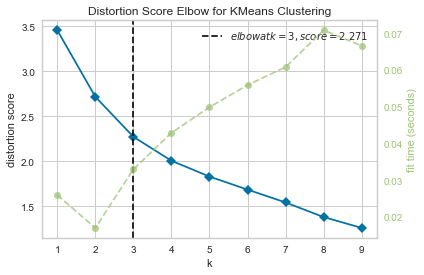

In [475]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(df_clustering)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [476]:
# set number of clusters
kclusters = 3

#run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0])

In [521]:
# create a daframe displying the top 10 venues for each district
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhood_venues_sorted = pd.DataFrame(columns=columns)
neighborhood_venues_sorted['Neighborhood'] = df7['Neighborhood']

for ind in np.arange(df6.shape[0]):
    neighborhood_venues_sorted.iloc[ind, 1:] = return_most_common_venues(df7.iloc[ind, :], num_top_venues)

neighborhood_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Affoltern,Bus Station,Supermarket,Hotel,Italian Restaurant,Department Store,Train Station,Grocery Store,Yoga Studio,Electronics Store,Fast Food Restaurant
1,Albisrieden,Supermarket,Bus Station,Trattoria/Osteria,Swiss Restaurant,Grocery Store,Yoga Studio,Electronics Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant
2,Alt-Wiedikon,Italian Restaurant,Restaurant,Thai Restaurant,Lounge,Beer Garden,Supermarket,Tapas Restaurant,Bakery,Japanese Restaurant,Burrito Place
3,Altstetten,Supermarket,Bakery,Tram Station,Gym,Swiss Restaurant,Platform,Chinese Restaurant,Discount Store,Hotel,Mediterranean Restaurant
4,City,Coffee Shop,Bar,Café,Vegetarian / Vegan Restaurant,Restaurant,Grocery Store,Shopping Mall,Cocktail Bar,Department Store,Sushi Restaurant


In [522]:
# add clustering labels
neighborhood_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Zuri_merged = df.copy()

Zuri_merged.drop(Zuri_merged.columns[[1,3,4]], axis=1, inplace=True)

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Zuri_merged = Zuri_merged.join(neighborhood_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Zuri_merged.head()

,District Number,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Rathaus,1,Swiss Restaurant,Café,Bar,Cocktail Bar,Hotel,French Restaurant,Lounge,Restaurant,Pedestrian Plaza,Boutique
1,1,Hochschulen,1,Swiss Restaurant,Hotel,Café,Coffee Shop,Pharmacy,Dessert Shop,Plaza,Restaurant,Science Museum,Mediterranean Restaurant
2,1,Lindenhof,1,Café,Swiss Restaurant,Bar,Hotel,French Restaurant,Restaurant,Department Store,Cocktail Bar,Vegetarian / Vegan Restaurant,Lounge
3,1,City,1,Coffee Shop,Bar,Café,Vegetarian / Vegan Restaurant,Restaurant,Grocery Store,Shopping Mall,Cocktail Bar,Department Store,Sushi Restaurant
4,2,Wollishofen,0,Plaza,Irish Pub,Bus Station,Supermarket,Restaurant,Yoga Studio,Donut Shop,Farmers Market,Falafel Restaurant,Factory


#### Final dataframe including the 10 most common venues for each neighbourhoods along with the relative districts, district prices and predicted neighborhood prices.

In [525]:
Zuri_complete=Zuri_merged.copy()
Zuri_complete.insert(1, 'District Price', df5r['District price'])
Zuri_complete.insert(2, 'Predicted Neighboorhood Price', df5r['Neighborhood price predicted'])
Zuri_complete

,District Number,District Price,Predicted Neighboorhood Price,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,2,2,Rathaus,1,Swiss Restaurant,Café,Bar,Cocktail Bar,Hotel,French Restaurant,Lounge,Restaurant,Pedestrian Plaza,Boutique
1,1,2,2,Hochschulen,1,Swiss Restaurant,Hotel,Café,Coffee Shop,Pharmacy,Dessert Shop,Plaza,Restaurant,Science Museum,Mediterranean Restaurant
2,1,2,2,Lindenhof,1,Café,Swiss Restaurant,Bar,Hotel,French Restaurant,Restaurant,Department Store,Cocktail Bar,Vegetarian / Vegan Restaurant,Lounge
3,1,2,2,City,1,Coffee Shop,Bar,Café,Vegetarian / Vegan Restaurant,Restaurant,Grocery Store,Shopping Mall,Cocktail Bar,Department Store,Sushi Restaurant
4,2,1,1,Wollishofen,0,Plaza,Irish Pub,Bus Station,Supermarket,Restaurant,Yoga Studio,Donut Shop,Farmers Market,Falafel Restaurant,Factory
5,2,1,0,Leimbach,0,Bus Station,Gas Station,Trail,Grocery Store,Light Rail Station,Yoga Studio,Electronics Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant
6,2,1,2,Enge,1,Park,Bar,Italian Restaurant,Restaurant,Tram Station,History Museum,Supermarket,Swiss Restaurant,Café,Middle Eastern Restaurant
7,3,0,2,Alt-Wiedikon,1,Italian Restaurant,Restaurant,Thai Restaurant,Lounge,Beer Garden,Supermarket,Tapas Restaurant,Bakery,Japanese Restaurant,Burrito Place
8,3,0,1,Friesenberg,0,Bus Station,Pool,Supermarket,Gym,Restaurant,Lounge,Yoga Studio,Donut Shop,Falafel Restaurant,Factory
9,3,0,2,Sihlfeld,1,Café,Bar,Italian Restaurant,Swiss Restaurant,Plaza,Ethiopian Restaurant,Supermarket,Thai Restaurant,Pizza Place,Diner


#### Cluster 0 neighbourhoods

In [527]:
Zuri_complete.loc[Zuri_complete['Cluster Labels'] == 0]

,District Number,District Price,Predicted Neighboorhood Price,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,2,1,1,Wollishofen,0,Plaza,Irish Pub,Bus Station,Supermarket,Restaurant,Yoga Studio,Donut Shop,Farmers Market,Falafel Restaurant,Factory
5,2,1,0,Leimbach,0,Bus Station,Gas Station,Trail,Grocery Store,Light Rail Station,Yoga Studio,Electronics Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant
8,3,0,1,Friesenberg,0,Bus Station,Pool,Supermarket,Gym,Restaurant,Lounge,Yoga Studio,Donut Shop,Falafel Restaurant,Factory
19,7,1,0,Hirslanden,0,Bus Station,Other Great Outdoors,River,Donut Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Factory,Event Space,Ethiopian Restaurant
20,7,1,0,Witikon,0,Bus Station,Indian Restaurant,Church,Supermarket,Bakery,Grocery Store,Soccer Field,Diner,Factory,Flea Market
24,9,1,1,Albisrieden,0,Supermarket,Bus Station,Trattoria/Osteria,Swiss Restaurant,Grocery Store,Yoga Studio,Electronics Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant
28,11,2,0,Affoltern,0,Bus Station,Supermarket,Hotel,Italian Restaurant,Department Store,Train Station,Grocery Store,Yoga Studio,Electronics Store,Fast Food Restaurant
30,11,2,0,Seebach,0,Bus Station,Pizza Place,Pool,Community Center,Doner Restaurant,Farmers Market,Falafel Restaurant,Factory,Event Space,Ethiopian Restaurant
31,12,0,0,Saatlen,0,Playground,Bus Station,Supermarket,Arts & Crafts Store,Donut Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Factory,Event Space


#### Cluster 1 neighbourhoods

In [528]:
Zuri_complete.loc[Zuri_complete['Cluster Labels'] == 1]

,District Number,District Price,Predicted Neighboorhood Price,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,2,2,Rathaus,1,Swiss Restaurant,Café,Bar,Cocktail Bar,Hotel,French Restaurant,Lounge,Restaurant,Pedestrian Plaza,Boutique
1,1,2,2,Hochschulen,1,Swiss Restaurant,Hotel,Café,Coffee Shop,Pharmacy,Dessert Shop,Plaza,Restaurant,Science Museum,Mediterranean Restaurant
2,1,2,2,Lindenhof,1,Café,Swiss Restaurant,Bar,Hotel,French Restaurant,Restaurant,Department Store,Cocktail Bar,Vegetarian / Vegan Restaurant,Lounge
3,1,2,2,City,1,Coffee Shop,Bar,Café,Vegetarian / Vegan Restaurant,Restaurant,Grocery Store,Shopping Mall,Cocktail Bar,Department Store,Sushi Restaurant
6,2,1,2,Enge,1,Park,Bar,Italian Restaurant,Restaurant,Tram Station,History Museum,Supermarket,Swiss Restaurant,Café,Middle Eastern Restaurant
7,3,0,2,Alt-Wiedikon,1,Italian Restaurant,Restaurant,Thai Restaurant,Lounge,Beer Garden,Supermarket,Tapas Restaurant,Bakery,Japanese Restaurant,Burrito Place
9,3,0,2,Sihlfeld,1,Café,Bar,Italian Restaurant,Swiss Restaurant,Plaza,Ethiopian Restaurant,Supermarket,Thai Restaurant,Pizza Place,Diner
10,4,0,2,Werd,1,Café,Bar,Italian Restaurant,Thai Restaurant,Pizza Place,Swiss Restaurant,Supermarket,Plaza,French Restaurant,Japanese Restaurant
11,4,0,2,Langstrasse,1,Bar,Italian Restaurant,Restaurant,Swiss Restaurant,Thai Restaurant,Mediterranean Restaurant,Café,Chinese Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant
12,4,0,0,Hard,1,Bus Station,American Restaurant,Pizza Place,Park,Furniture / Home Store,Plaza,Asian Restaurant,Train Station,Beer Garden,Outdoors & Recreation


####  Cluster 2 neighbourhood

In [529]:
Zuri_complete.loc[Zuri_complete['Cluster Labels'] == 2]

,District Number,District Price,Predicted Neighboorhood Price,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,7,1,0,Hottingen,2,Swiss Restaurant,Gym / Fitness Center,Yoga Studio,Donut Shop,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Factory,Event Space


In [530]:
Zuri_complete_=Zuri_complete.copy()
Zuri_complete_['Latitude']=Zuri_venues['Neighborhood Latitude']
Zuri_complete_['Longitude']=Zuri_venues['Neighborhood Longitude']

#### Visualization of the neighbourhood clusters on the map

In [531]:
latidude=47.3723941
longitude=8.5423328

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
#colors_array = cm.colors(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = [
    'red',
    'blue',
    'gray',
    'darkred',
    'lightred',
    'orange',
    'beige',
    'green',
    'darkgreen',
    'lightgreen',
    'darkblue',
    'lightblue',
    'purple',
    'darkpurple',
    'pink',
    'cadetblue',
    'lightgray',
    'black'
]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df['latitude'], df['longitude'], Zuri_complete['Neighborhood'], Zuri_complete['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
#    print(label) 
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colors[cluster-1],
        fill=True,
        fill_color=colors[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
 
map_clusters

#### Visualization of the neighbourhood predicted price levels on the map

In [534]:
latidude=47.3723941
longitude=8.5423328

# create map
map_clusters1 = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df['latitude'], df['longitude'], Zuri_complete['Neighborhood'], Zuri_complete['Predicted Neighboorhood Price']):
    label = folium.Popup(str(poi) + ' Predicted price ' + str(cluster), parse_html=True)
#    print(label) 
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colors[cluster-1],
        fill=True,
        fill_color=colors[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
 
map_clusters

# 7. List of neighbourhoods with price levels lower than their average district prices showing the most common venues

In [533]:
l=[]
Zuri_convenient=Zuri_complete.copy()
for i in range (len(Zuri_complete['Neighborhood'])):
    if Zuri_complete['Predicted Neighboorhood Price'][i]<Zuri_complete['District Price'][i]:
        l.append(i)
    else:
        i=i+1
Zuri_convenient.iloc[l]

,District Number,District Price,Predicted Neighboorhood Price,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,2,1,0,Leimbach,0,Bus Station,Gas Station,Trail,Grocery Store,Light Rail Station,Yoga Studio,Electronics Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant
15,6,1,0,Unterstrass,1,Pizza Place,Tram Station,Hockey Rink,Gourmet Shop,Doner Restaurant,Kids Store,Supermarket,Café,Dance Studio,Paella Restaurant
17,7,1,0,Fluntern,1,Bakery,Tram Station,Grocery Store,Bus Station,Plaza,Supermarket,Gastropub,Donut Shop,Farmers Market,Falafel Restaurant
18,7,1,0,Hottingen,2,Swiss Restaurant,Gym / Fitness Center,Yoga Studio,Donut Shop,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Factory,Event Space
19,7,1,0,Hirslanden,0,Bus Station,Other Great Outdoors,River,Donut Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Factory,Event Space,Ethiopian Restaurant
20,7,1,0,Witikon,0,Bus Station,Indian Restaurant,Church,Supermarket,Bakery,Grocery Store,Soccer Field,Diner,Factory,Flea Market
27,10,2,0,Wipkingen,1,Park,Gym,Swiss Restaurant,Café,Bakery,Yoga Studio,Electronics Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant
28,11,2,0,Affoltern,0,Bus Station,Supermarket,Hotel,Italian Restaurant,Department Store,Train Station,Grocery Store,Yoga Studio,Electronics Store,Fast Food Restaurant
30,11,2,0,Seebach,0,Bus Station,Pizza Place,Pool,Community Center,Doner Restaurant,Farmers Market,Falafel Restaurant,Factory,Event Space,Ethiopian Restaurant
